# Forschungsdaten der Sächsischen Akademie der Wissenschaften (SAW)

<a id="0"></a>
## Inhalt


1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

3. [Word Clouds](#3)

<a id="1"></a>
## 1. Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [2]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [3]:

# Erstellen des 1. DataFrames
data_saw = pd.read_csv(r'../../data/refined/clarin/saw/saw-records-20240620_refined.csv')

# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_saw_grouped = data_saw.copy()
data_saw_grouped['record id'] = data_saw_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record identifier
data_saw_grouped = data_saw_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'subject': lambda x: '; '.join(x.dropna().unique()),  # Einzigartige Werte zusammenführen
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),  
    'contributor': lambda x: '; '.join(x.dropna().unique()),  
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()),  
    'relation': lambda x: '; '.join(x.dropna().unique()),  
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'title': lambda x: '; '.join(x.dropna().unique()),  
    'language': lambda x: '; '.join(x.dropna().unique()),  
    'source': lambda x: '; '.join(x.dropna().unique()),  
    'publisher': lambda x: '; '.join(x.dropna().unique()),   
    'record id': lambda x: '; '.join(x.dropna().unique())  
}).reset_index(drop=True)

data_saw_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen


# Transformieren von 'datestamp' und 'date' zu datetime objects
data_saw_grouped[['date', 'datestamp']] = data_saw_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_saw[['date', 'datestamp']] = data_saw[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_saw_grouped.replace('','NA', inplace=True)  # Fehlende Werte mit NA ersetzen




                        column count   type
4                  contributor    26  valid
3                      creator   120  valid
9                         date   238  valid
0                    datestamp   327  valid
10                 description   209  valid
2                   identifier   327  valid
12                    language   327  valid
14                   publisher   208  valid
15                   record id   327  valid
8                     relation   327  valid
7                       rights   209  valid
13                      source   238  valid
1                      subject     1  valid
11                       title   327  valid
5                         type   327  valid
6   type - dcmi recommendation   327  valid


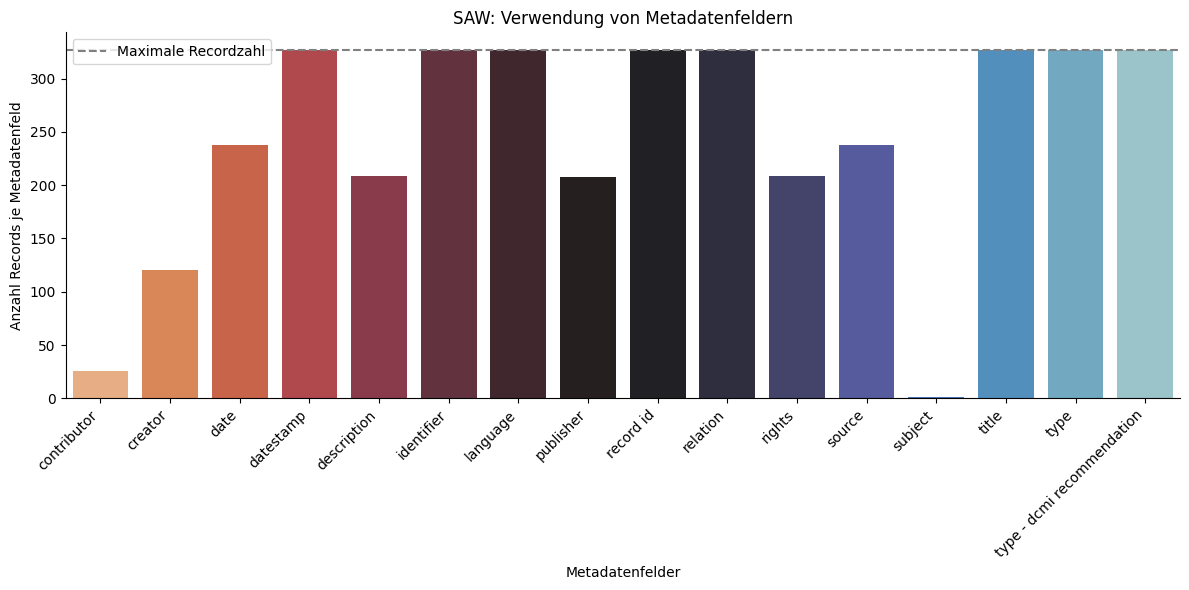

In [4]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_saw_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_saw_grouped[column][data_saw_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_saw_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='icefire_r')

# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('SAW: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("SAW_Verwendung_von_Metadatenfeldern.png", dpi=600)
plt.show()


In [5]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'
data_saw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   327 non-null    datetime64[ns, UTC]
 1   relation                    3666 non-null   object             
 2   type                        459 non-null    object             
 3   type - dcmi recommendation  459 non-null    object             
 4   title                       412 non-null    object             
 5   creator                     386 non-null    object             
 6   language                    339 non-null    object             
 7   identifier                  327 non-null    object             
 8   format                      326 non-null    object             
 9   format - mediatype          326 non-null    object             
 10  format - subtype            326 non-null    object          

In [6]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'
data_saw.head()

,datestamp,relation,type,type - dcmi recommendation,title,creator,language,identifier,format,format - mediatype,format - subtype,date,description,source,publisher,rights,contributor,subject,record id,record - header - setSpec
0,2024-04-17 18:28:27+00:00,http://cts.informatik.uni-leipzig.de/,collection,collection,Digital Muqtabas,NaN,arb,urn:cts:muqtabas:oclc,application/xml,application,xml,NaT,NaN,https://github.com/tillgrallert/digital-muqtabas,NaN,CC BY SA,NaN,NaN,cts-muqtabas-urn:cts:muqtabas:oclc,cts
1,NaT,urn:cts:muqtabas:oclc.4770057679_i.1.TEIP5:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,urn:cts:muqtabas:oclc.4770057679_i.10.TEIP5:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,urn:cts:muqtabas:oclc.4770057679_i.11.TEIP5:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,urn:cts:muqtabas:oclc.4770057679_i.12.TEIP5:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'
data_saw.describe()

,datestamp,relation,type,type - dcmi recommendation,title,creator,language,identifier,format,format - mediatype,format - subtype,date,description,source,publisher,rights,contributor,subject,record id,record - header - setSpec
count,327,3666,459,459,412,386,339,327,326,326,326,399,304,238,216,209,46,1,327,327
unique,NaN,3377,9,2,379,176,56,327,5,2,5,NaN,295,104,3,4,26,1,327,5
top,NaN,http://cts.informatik.uni-leipzig.de/,article,text,مجلة المقتبس Majallat al-Muqtabas TEI edition,"Kliegl, Reinhold",eng,urn:cts:muqtabas:oclc,application/xml,application,xml,NaN,Pśenjasenje toś togo słownika wót nutśikowneje...,The Mind Research Repository (beta); No 1 (2013),The Mind Research Repository (beta),CC BY SA,DFG,Eyetracking,cts-muqtabas-urn:cts:muqtabas:oclc,cts
freq,NaN,118,117,457,32,50,123,1,118,239,118,NaN,4,117,117,99,8,1,1,118
mean,2024-04-17 18:33:52.831804416+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-16 11:25:42.857142784+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2024-04-17 17:34:33+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1744-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-04-17 18:12:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-04-17 18:31:18+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-04-17 18:58:04.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-04-17 19:36:50+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'
data_saw_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   327 non-null    datetime64[ns, UTC]
 1   subject                     327 non-null    object             
 2   identifier                  327 non-null    object             
 3   creator                     327 non-null    object             
 4   contributor                 327 non-null    object             
 5   type                        327 non-null    object             
 6   type - dcmi recommendation  327 non-null    object             
 7   rights                      327 non-null    object             
 8   relation                    327 non-null    object             
 9   date                        238 non-null    datetime64[ns, UTC]
 10  description                 327 non-null    object            

In [9]:
'Recordweiser Dataframe: Erste 5 Zeilen'
data_saw_grouped.head()


,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record id
0,2024-04-17 18:28:27+00:00,NA,urn:cts:muqtabas:oclc,NA,NA,collection,collection,CC BY SA,http://cts.informatik.uni-leipzig.de/; urn:cts...,NaT,NA,Digital Muqtabas,arb,https://github.com/tillgrallert/digital-muqtabas,NA,cts-muqtabas-urn:cts:muqtabas:oclc
1,2024-04-17 18:21:29+00:00,NA,urn:cts:muqtabas:oclc.4770057679_i.1.TEIP5:,NA,NA,document,text,CC BY SA,http://cts.informatik.uni-leipzig.de/; http://...,2015-01-01 00:00:00+00:00,NA,"مجلة المقتبس Majallat al-Muqtabas, Vol. 1, no....",arb,https://github.com/tillgrallert/digital-muqtab...,NA,cts-muqtabas-urn:cts:muqtabas:oclc.4770057679_...
2,2024-04-17 18:34:10+00:00,NA,urn:cts:muqtabas:oclc.4770057679_i.10.TEIP5:,NA,NA,document,text,CC BY SA,http://cts.informatik.uni-leipzig.de/; http://...,2015-01-01 00:00:00+00:00,NA,مجلة المقتبس Majallat al-Muqtabas TEI edition,arb,https://github.com/tillgrallert/digital-muqtab...,NA,cts-muqtabas-urn:cts:muqtabas:oclc.4770057679_...
3,2024-04-17 18:26:36+00:00,NA,urn:cts:muqtabas:oclc.4770057679_i.11.TEIP5:,NA,NA,document,text,CC BY SA,http://cts.informatik.uni-leipzig.de/; http://...,2015-01-01 00:00:00+00:00,NA,مجلة المقتبس Majallat al-Muqtabas TEI edition,arb,https://github.com/tillgrallert/digital-muqtab...,NA,cts-muqtabas-urn:cts:muqtabas:oclc.4770057679_...
4,2024-04-17 18:40:17+00:00,NA,urn:cts:muqtabas:oclc.4770057679_i.12.TEIP5:,NA,NA,document,text,CC BY SA,http://cts.informatik.uni-leipzig.de/; http://...,2015-01-01 00:00:00+00:00,NA,مجلة المقتبس Majallat al-Muqtabas TEI edition,arb,https://github.com/tillgrallert/digital-muqtab...,NA,cts-muqtabas-urn:cts:muqtabas:oclc.4770057679_...


In [10]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_saw_grouped.describe()

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record id
count,327,327,327,327,327,327,327,327,327,238,327,327,327,327,327,327
unique,NaN,2,327,105,17,7,2,5,327,NaN,207,294,57,105,4,327
top,NaN,NA,urn:cts:muqtabas:oclc,NA,NA,document,text,NA,http://cts.informatik.uni-leipzig.de/; urn:cts...,NaN,NA,مجلة المقتبس Majallat al-Muqtabas TEI edition,eng,The Mind Research Repository (beta); No 1 (2013),NA,cts-muqtabas-urn:cts:muqtabas:oclc
freq,NaN,326,1,207,301,116,325,118,1,NaN,118,32,122,117,119,1
mean,2024-04-17 18:33:52.831804416+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-05-30 16:50:25.210084096+00:00,NaN,NaN,NaN,NaN,NaN,NaN
min,2024-04-17 17:34:33+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1744-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-04-17 18:12:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-04-17 18:31:18+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-04-17 18:58:04.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-04-17 19:36:50+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-17 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
'Verwendete Farbpalette'

icefire_palette = sns.color_palette("icefire", 12)
icefire_hex = icefire_palette.as_hex()
print(icefire_hex)
sns.color_palette('icefire', 12)

sns.color_palette("icefire", 12, as_cmap=False)


['#87c2cf', '#4e9ecd', '#3a73ce', '#494c9e', '#343356', '#212028', '#2a1e20', '#542732', '#8d2e43', '#c33a3c', '#e66734', '#f5a066']


[(0.52894085, 0.76217215, 0.81336913),
 (0.30516161, 0.618389, 0.80528692),
 (0.22665681, 0.45052233, 0.80860217),
 (0.28640325, 0.29655509, 0.61811374),
 (0.20586893, 0.19855368, 0.33701661),
 (0.12948748, 0.12733187, 0.15580631),
 (0.16533376, 0.11797856, 0.12621303),
 (0.33107961, 0.1530674, 0.19543758),
 (0.55348804, 0.17956232, 0.26416003),
 (0.7630579, 0.22731637, 0.23700095),
 (0.90195099, 0.40380687, 0.20301555),
 (0.95923863, 0.62676473, 0.40043317)]

<a id="2"></a>
## 2. Univariate Plots

[Zurück zum Anfang](#0)


### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

frühstes Datum: 1744-01-01 ; spätestes Datum: 2024-04-17


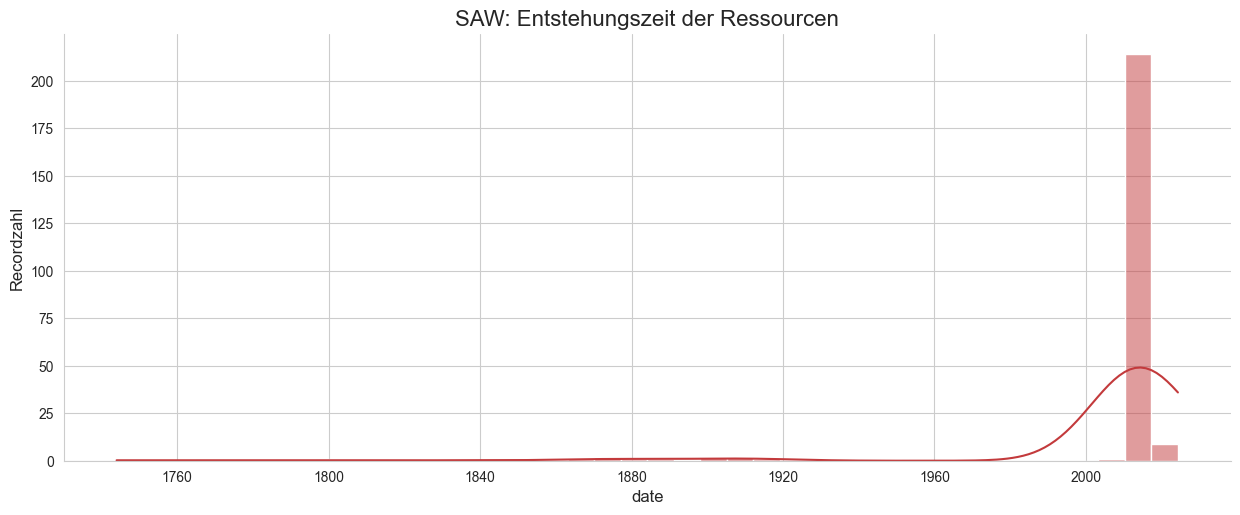

In [29]:

sns.set_style('whitegrid')
sns.displot(data_saw_grouped, x='date', bins=40, kde=True, color = '#c33a3c', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten anhand von 'date' in absolten Zahlen

#plt.xticks(rotation=45)
plt.title('SAW: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)

plt.savefig("SAW_date_hist.png", dpi=600, bbox_inches='tight')
print('frühstes Datum:', data_saw_grouped['date'].min().date(), '; spätestes Datum:', data_saw_grouped['date'].max().date())
plt.show()


### Sprachverteilung

[Zurück zum Anfang](#0)

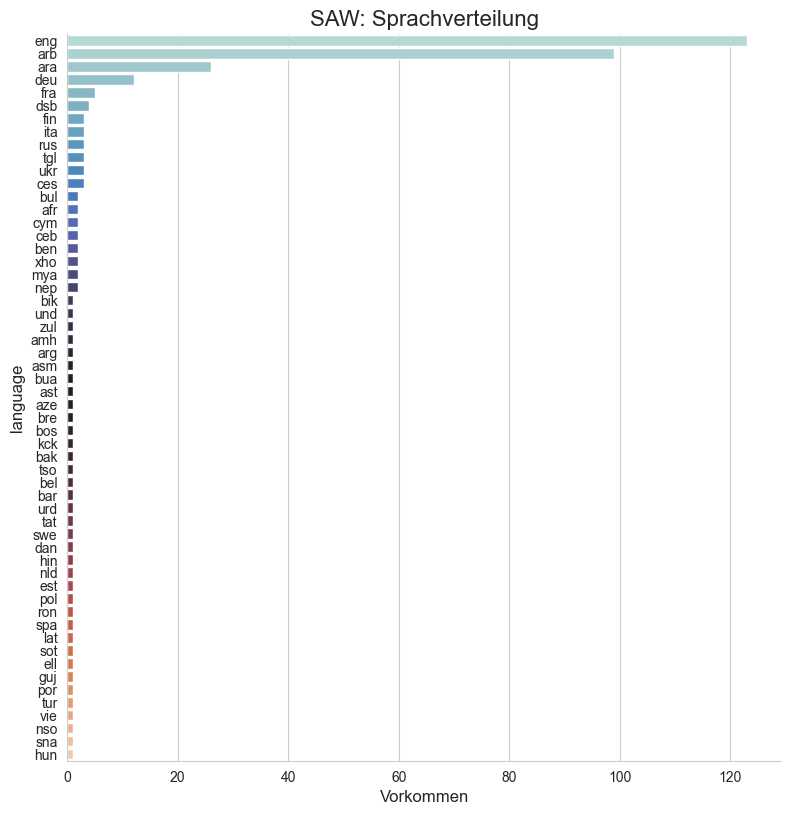

In [13]:
'Catplot: Verteilung der Sprachen'

sns.set_style('whitegrid')
# Reihenfolge der Werte festlegen
order = data_saw['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_saw['language'] = pd.Categorical(data_saw['language'], categories=order, ordered=True)

sns.catplot(data_saw, y = 'language', kind = 'count', aspect = 1, height = 8, hue = 'language', palette = 'icefire', legend=False)

plt.title('SAW: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)#
plt.xlabel('Vorkommen', fontsize=12)
plt.savefig("SAW_language_cat.png", dpi=600, bbox_inches='tight')
plt.show()

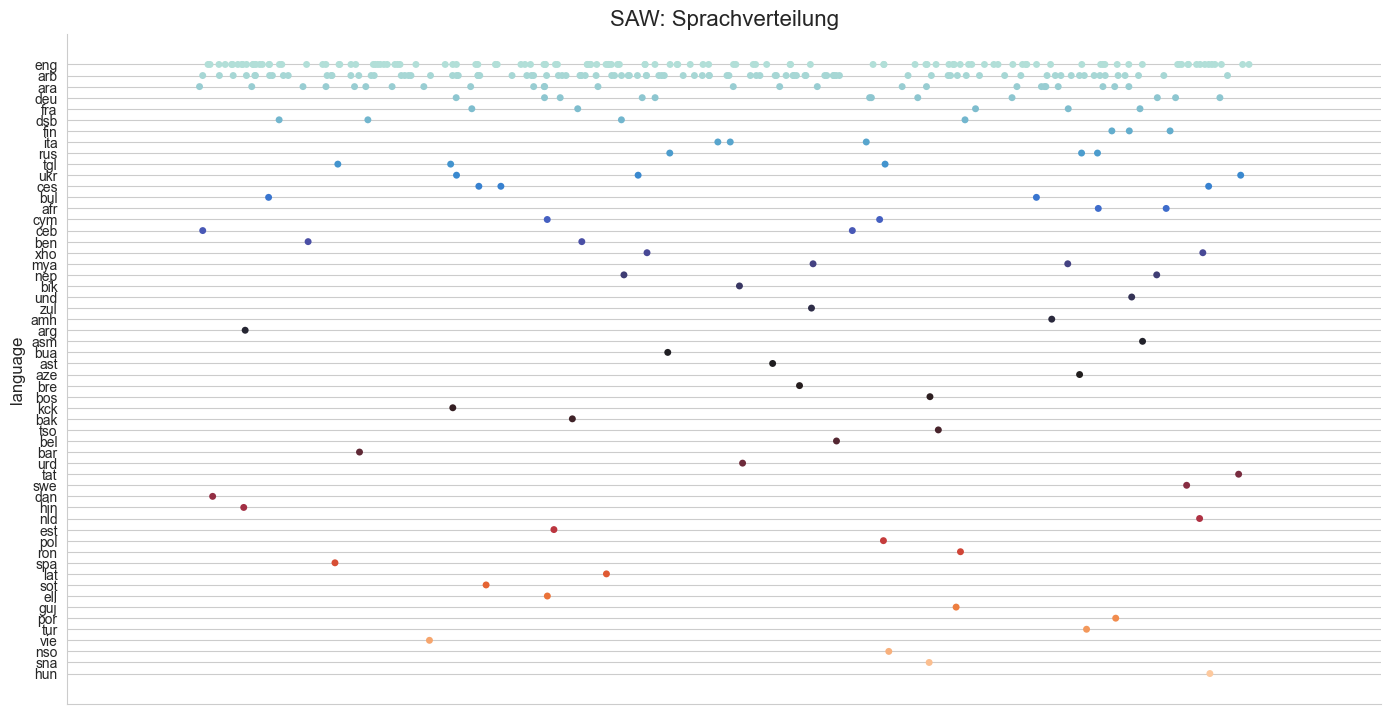

In [14]:
'Scatterplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_saw['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_saw['language'] = pd.Categorical(data_saw['language'], categories=order, ordered=True)


sns.catplot(data_saw, y = 'language', aspect = 2, height = 7, hue = 'language', palette="icefire", jitter=0.4, legend=False) # Sprachverteilung mit erhöhtem Jitter

plt.title('SAW: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.show()


### Verteilung der Publisher

[Zurück zum Anfang](#0)

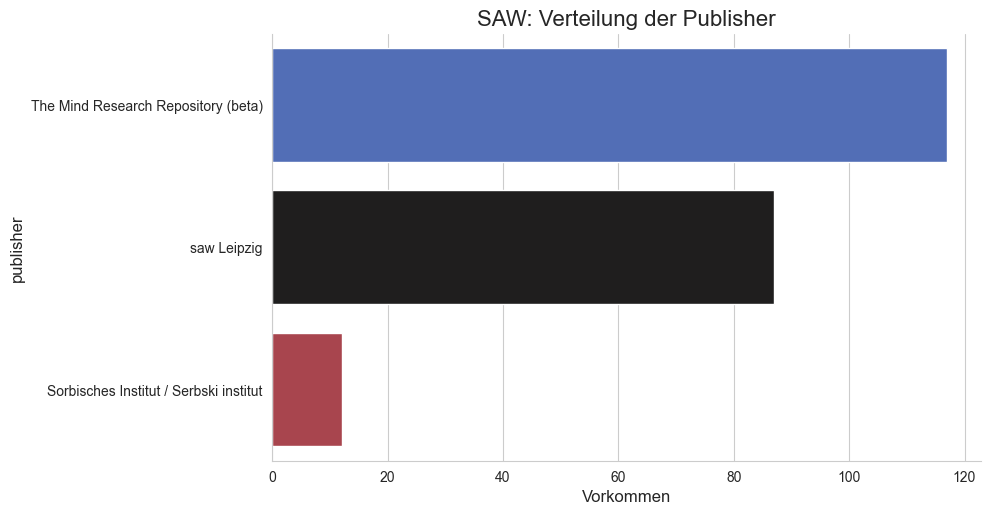

In [15]:
'Displot: Verteilung der Publisher'

# Reihenfolge der Werte festlegen
order = data_saw['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_saw['publisher'] = pd.Categorical(data_saw['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.catplot(data_saw, y = 'publisher', kind='count', aspect = 2, hue='publisher', palette="icefire", legend=False)



plt.title('SAW: Verteilung der Publisher', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('publisher', fontsize=12)
plt.savefig("SAW_publisher_cat.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

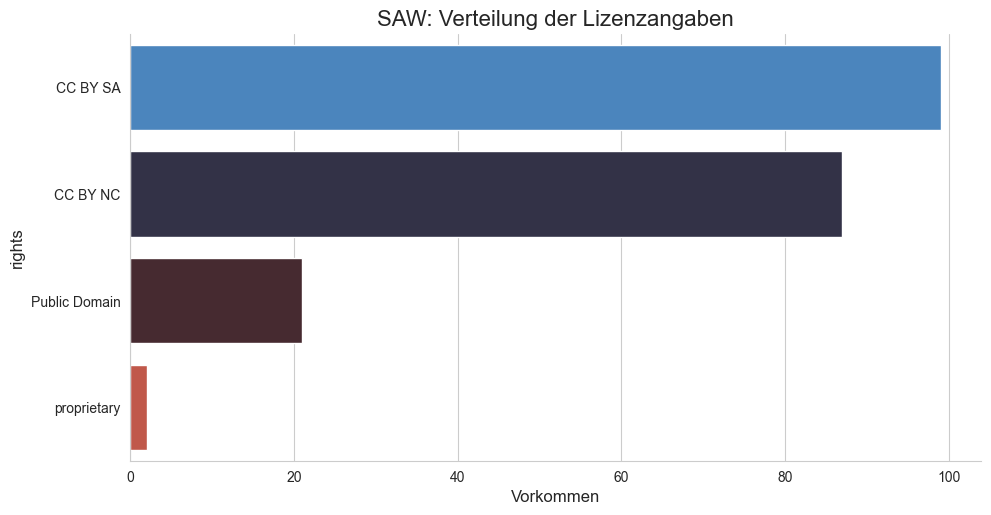

In [16]:
'Catplot: Verteilung der Lizenzangaben'

order = data_saw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_saw['rights'] = pd.Categorical(data_saw['rights'], categories=order, ordered=True)


sns.catplot(data_saw, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="icefire", legend=False)

plt.title('SAW: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.savefig("SAW_rights_cat.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

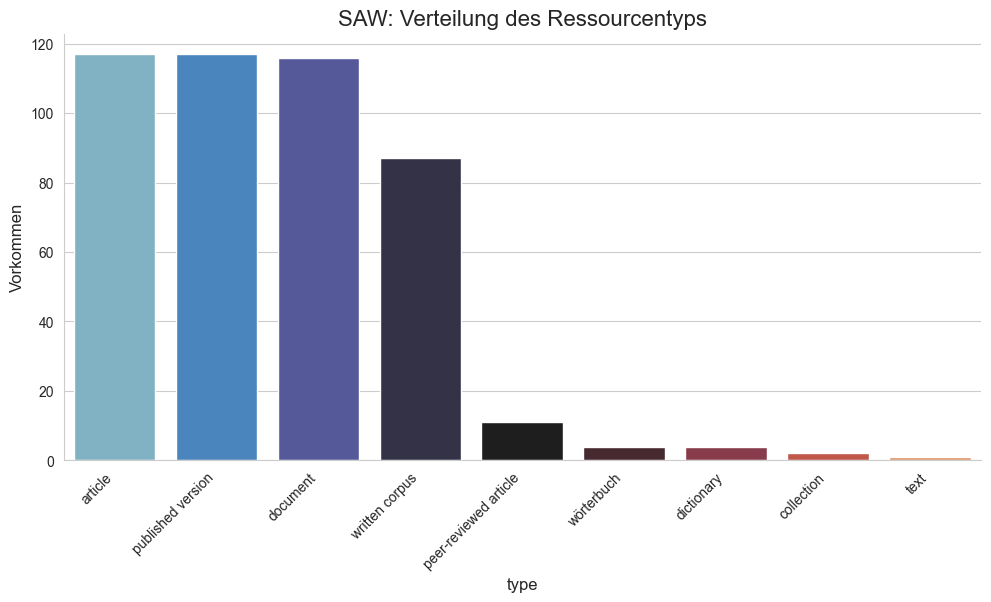

In [17]:
'Verteilung des Ressourcentyps wie von der SAW angegeben'

# Reihenfolge der Werte festlegen
order_type = data_saw['type'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_saw['type'] = pd.Categorical(data_saw['type'], categories=order_type, ordered=True)

sns.catplot(data_saw, x = 'type', kind = 'count', aspect = 2, hue = 'type', palette='icefire', legend=False)

plt.title('SAW: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('type', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("SAW_typ_hist.png", dpi=600, bbox_inches='tight')
plt.show()

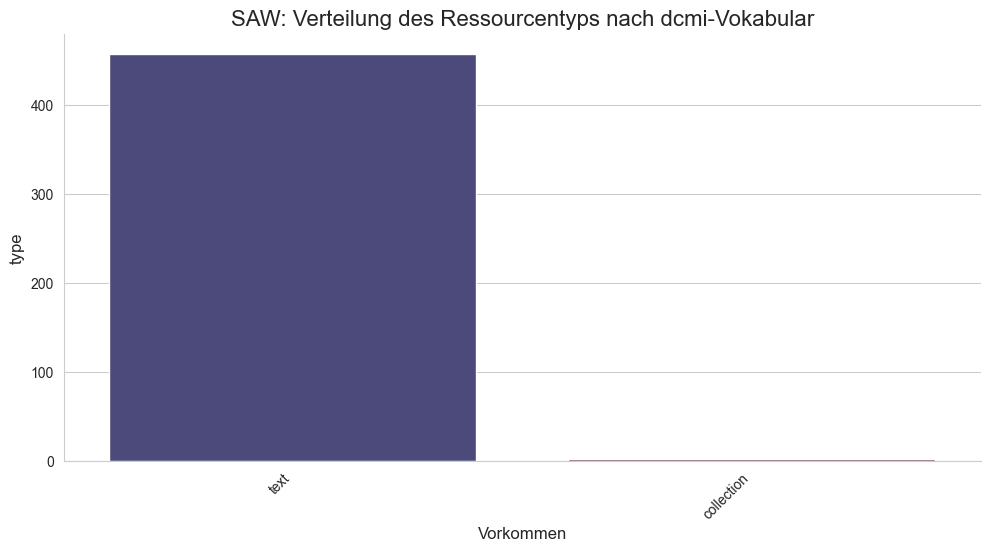

In [18]:
'Verteilung des Ressourcentyps nach dcmi-Vokabular'

order_dcmi = data_saw['type - dcmi recommendation'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_saw['type - dcmi recommendation'] = pd.Categorical(data_saw['type - dcmi recommendation'], categories=order_dcmi, ordered=True)

sns.catplot(data_saw, x = 'type - dcmi recommendation', kind = 'count', aspect = 2, hue = 'type - dcmi recommendation', palette='icefire', legend=False)

plt.title('SAW: Verteilung des Ressourcentyps nach dcmi-Vokabular', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("SAW_typ_dcmi_hist.png", dpi=600, bbox_inches='tight')
plt.show()

### Verteilung des Formats

[Zurück zum Anfang](#0)

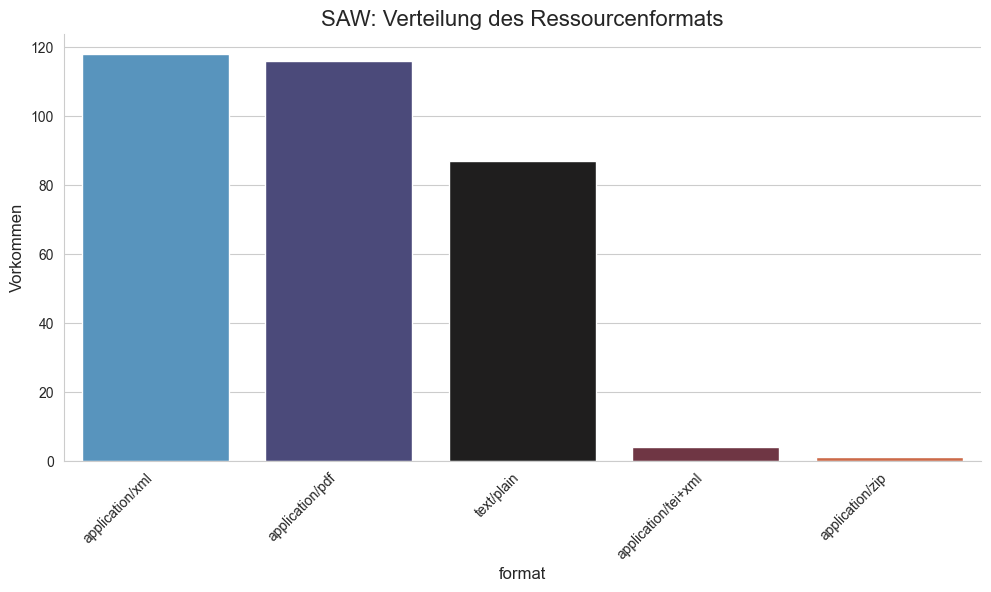

In [19]:
'Verteilung des Formats wie von der SAW angegeben'

# Reihenfolge der Werte festlegen
order_type = data_saw['format'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_saw['format'] = pd.Categorical(data_saw['format'], categories=order_type, ordered=True)

sns.catplot(data_saw, x = 'format', kind = 'count', aspect = 2, hue = 'format', palette='icefire', legend=False)

plt.title('SAW: Verteilung des Ressourcenformats', fontsize=16)
plt.xlabel('format', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("SAW_format_hist.png", dpi=600, bbox_inches='tight')
plt.show()

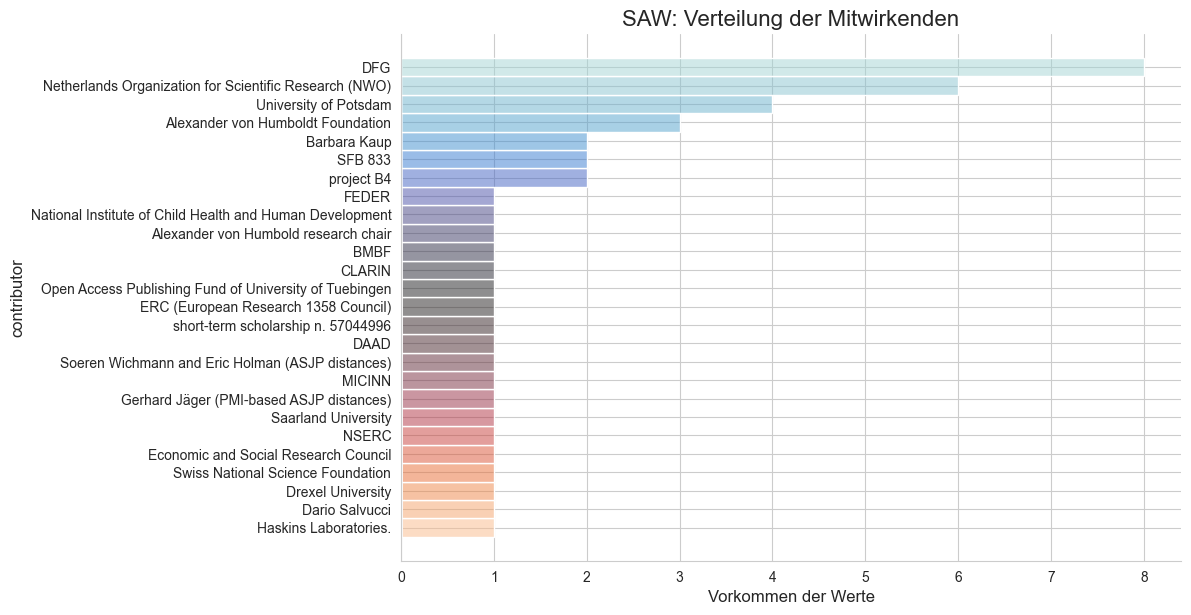

In [20]:
'Verteilung des contributor'

# Reihenfolge der Werte festlegen
order_type = data_saw['contributor'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_saw['contributor'] = pd.Categorical(data_saw['contributor'], categories=order_type, ordered=True)

sns.set_style('whitegrid')
sns.displot(data_saw, y = 'contributor', hue='contributor', palette="icefire", height = 6, aspect =2, legend=False)

plt.title('SAW: Verteilung der Mitwirkenden', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('contributor', fontsize=12)
plt.savefig("SAW_Verteilung_contributor_hist.png", dpi=600, bbox_inches='tight')

plt.show()

<a id="3"></a>
## 3. Word Clouds

[Zurück zum Anfang](#0)




### Titelbegriffe

[Zurück zum Anfang](#0)

{'edition': 1.0, 'Muqtabas': 0.97, 'مجلة': 0.96, 'المقتبس': 0.96, 'Majallat': 0.96, 'al': 0.96, 'TEI': 0.96, 'Vol': 0.64, 'Teilkorpus': 0.61, 'subcorpus': 0.61, 'new': 0.59, 'Nachrichten': 0.57, 'no': 0.54, 'ara': 0.46, 'OSIAN_2018': 0.46, 'Wikipedia': 0.36, 'Reading': 0.31, 'corpus': 0.26, 'Arabic': 0.25, 'Arabische': 0.25, 'Korpus': 0.24, 'n': 0.21, 'Bible': 0.19, 'German': 0.16, 'Web': 0.16, 'effect': 0.16, 'Processing': 0.16, 'Version': 0.15, 'during': 0.15, 'English': 0.13, 'Preview': 0.13, 'Chinese': 0.13, 'parafoveal': 0.12, 'Word': 0.12, 'Semantic': 0.12, 'sentence': 0.11, 'differences': 0.11, 'Evidence': 0.1, 'Memory': 0.1, 'Model': 0.09, 'Eye': 0.09, 'Benefit': 0.08, 'Working': 0.08, 'Movement': 0.08, 'fixation': 0.07, 'Age': 0.07, 'Lexical': 0.07, 'saccade': 0.07, 'language': 0.07, 'Deutsches': 0.06, 'Südafrika': 0.06, 'za_web_2018_10K': 0.06, 'South': 0.06, 'Africa': 0.06, 'as': 0.06, 'between': 0.06, 'attention': 0.06, 'duration': 0.06, 'Control': 0.06, 'microsaccade': 0.0

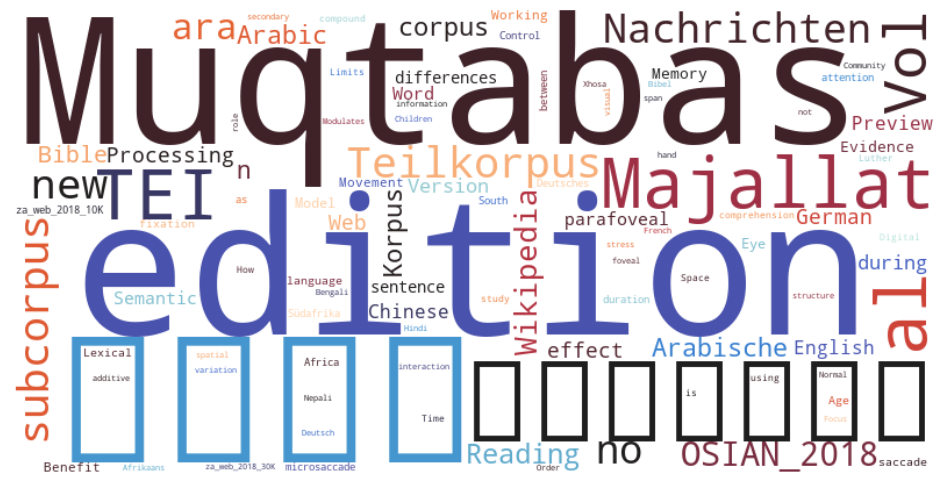

In [21]:
'Anpassung des text encodings für die Wordcloud nicht möglich'

text_data = data_saw["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set([
    'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
    'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
    'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from'])
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Urheber*innen

[Zurück zum Anfang](#0)

{'University': 1.0, 'Kliegl Reinhold': 0.6463414634146342, 'Tübingen': 0.32926829268292684, 'Groningen': 0.2926829268292683, 'Vasishth Shravan': 0.2073170731707317, 'Yan Ming': 0.15853658536585366, 'Potsdam': 0.14634146341463414, 'Sorbisches Institut': 0.14634146341463414, 'Institut Serbski': 0.14634146341463414, 'Serbski institut': 0.14634146341463414, 'institut Sorbisches': 0.13414634146341464, 'Harald University': 0.12195121951219512, 'Wieling Martijn': 0.12195121951219512, 'Baayen R': 0.10975609756097561, 'R Harald': 0.10975609756097561, 'Engbert Ralf': 0.10975609756097561, 'Laubrock Jochen': 0.10975609756097561, 'Alberta': 0.0975609756097561, 'Department': 0.0975609756097561, 'Psychology': 0.0975609756097561, 'Shu Hua': 0.0975609756097561, 'Oberauer Klaus': 0.0975609756097561, 'Plag Ingo': 0.08536585365853659, 'Lewis Richard': 0.07317073170731707, 'Richard L': 0.07317073170731707, 'Risse Sarah': 0.07317073170731707, 'Nerbonne John': 0.07317073170731707, 'Kaup Barbara': 0.073170731

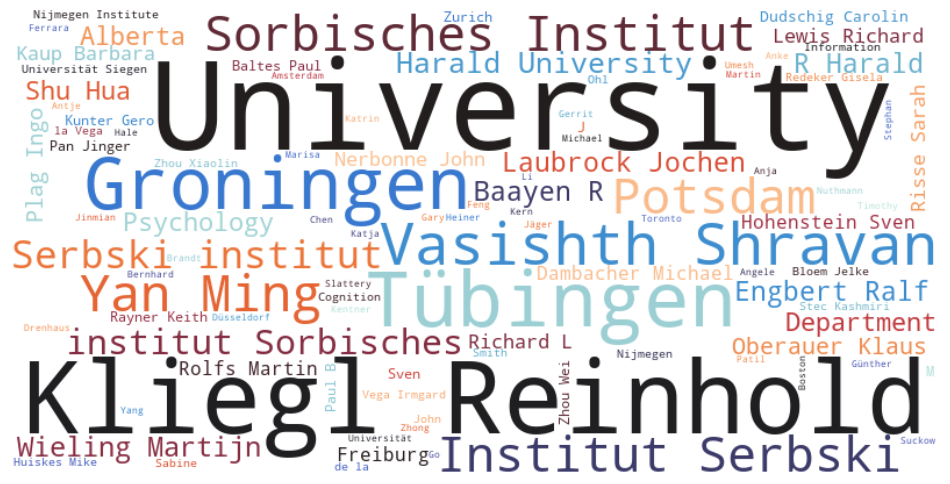

In [22]:

'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_saw["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Quellen

[Zurück zum Anfang](#0)

{'Mind Research': 1.0, 'Research Repository': 1.0, 'Repository beta': 1.0, 'beta No': 1.0, 'retrieved via': 0.9829059829059829, 'via Canonical': 0.9829059829059829, 'Canonical Text': 0.9829059829059829, 'Text Service': 0.9829059829059829, 'Service http': 0.9829059829059829, 'http cts': 0.9829059829059829, 'cts informatik': 0.9829059829059829, 'informatik uni': 0.9829059829059829, 'uni leipzig': 0.9829059829059829, 'leipzig de': 0.9829059829059829, 'cts http': 0.9743589743589743, 'https github': 0.8290598290598291, 'github com': 0.8290598290598291, 'com tillgrallert': 0.8290598290598291, 'tillgrallert digital': 0.8290598290598291, 'digital muqtabas': 0.8290598290598291, 'muqtabas blob': 0.8205128205128205, 'blob master': 0.8205128205128205, 'master xml': 0.8205128205128205, 'xml oclc_4770057679': 0.8205128205128205, 'TEIP5 xml': 0.8205128205128205, 'xml retrieved': 0.8205128205128205, 'de muqtabas': 0.8205128205128205, 'muqtabas cts': 0.8205128205128205, 'http paralleltext': 0.170940170

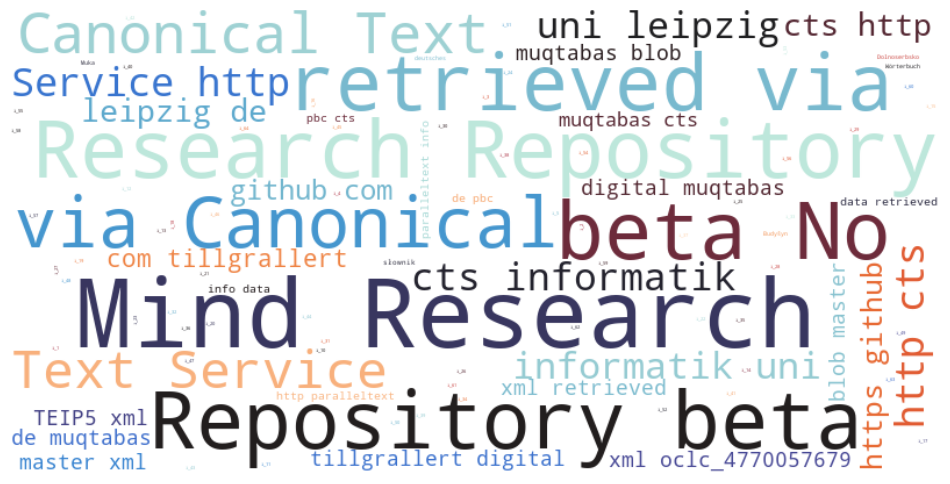

In [23]:
text_data = data_saw["source"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, 
stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Thema der Ressource

[Zurück zum Anfang](#0)

{'Eyetracking': 1.0}


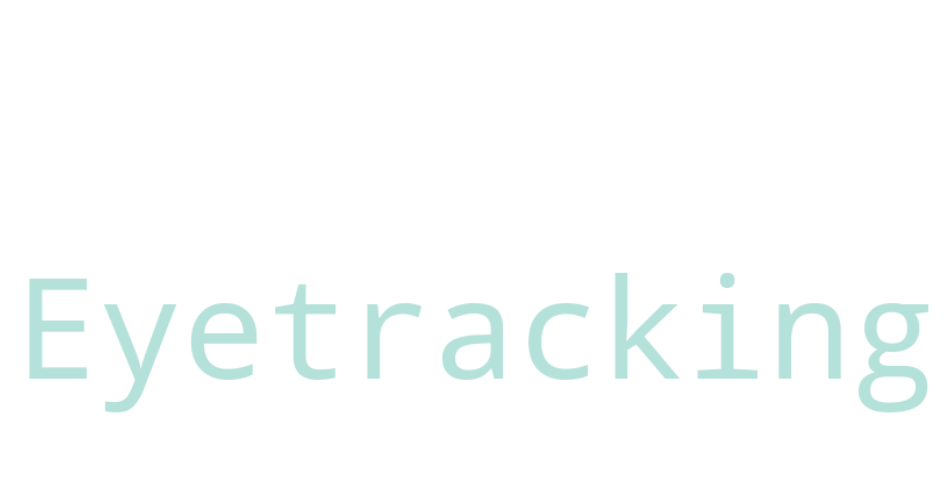

In [24]:
text_data = data_saw["subject"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Beschreibung der Ressource

[Zurück zum Anfang](#0)

{'to': 1.0, 'Deutscher Wortschatz': 0.7665198237885462, 'that': 0.7400881057268722, 'with': 0.73568281938326, 'i': 0.6828193832599119, 'data': 0.5947136563876652, 'can be': 0.4845814977973568, 'based on': 0.46255506607929514, 'by': 0.4581497797356828, 'this': 0.44933920704845814, 'effect': 0.44052863436123346, 'results are': 0.43171806167400884, 'link': 0.4008810572687225, 'more than': 0.3920704845814978, 'denen': 0.3876651982378855, 'each word': 0.3876651982378855, 'related words': 0.3876651982378855, 'other languages': 0.3876651982378855, 'erstellt im': 0.3832599118942731, 'im Rahmen': 0.3832599118942731, 'Rahmen des': 0.3832599118942731, 'des Projektes': 0.3832599118942731, 'Projektes Deutscher': 0.3832599118942731, 'Wortschatz bzw': 0.3832599118942731, 'bzw Wortschatz': 0.3832599118942731, 'Wortschatz Leipzig': 0.3832599118942731, 'Leipzig br': 0.3832599118942731, 'Projekt sammelt': 0.3832599118942731, 'sammelt regelmäßig': 0.3832599118942731, 'regelmäßig meist': 0.3832599118942731

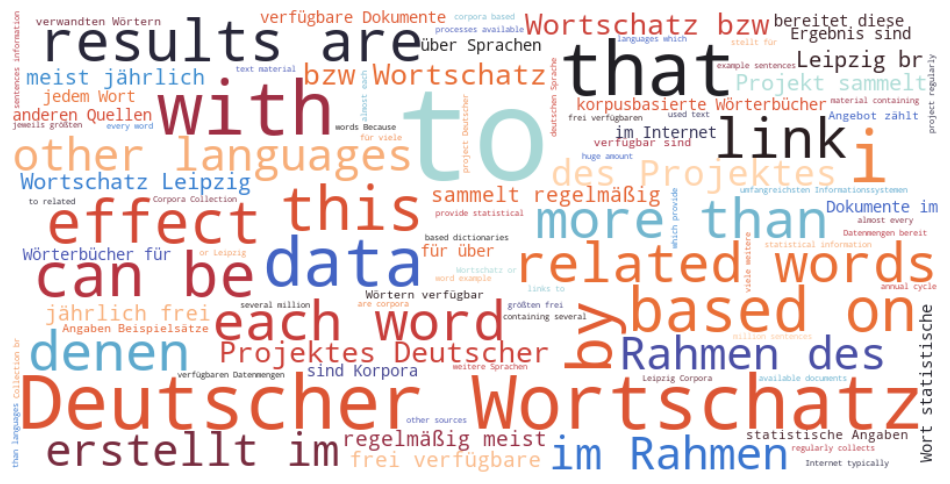

In [25]:
text_data = data_saw["description"].str.cat(sep=' ') # Werte werden als string zusammengefügt
# stopwords = set([
#     'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
#     'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
#     'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from', ]) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='icefire', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud
